In [188]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': [15, 5]}, font_scale=1.3)

# Data Wrangling
* understand the data

In [189]:
df = pd.read_csv('anime.csv')
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14578 entries, 0 to 14577
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         14578 non-null  object 
 1   mediaType     14510 non-null  object 
 2   eps           14219 non-null  float64
 3   duration      9137 non-null   float64
 4   ongoing       14578 non-null  bool   
 5   startYr       14356 non-null  float64
 6   finishYr      14134 non-null  float64
 7   sznOfRelease  3767 non-null   object 
 8   description   8173 non-null   object 
 9   studios       14578 non-null  object 
 10  tags          14578 non-null  object 
 11  contentWarn   14578 non-null  object 
 12  watched       14356 non-null  float64
 13  watching      14578 non-null  int64  
 14  wantWatch     14578 non-null  int64  
 15  dropped       14578 non-null  int64  
 16  rating        12107 non-null  float64
 17  votes         12119 non-null  float64
dtypes: bool(1), float64(7), in

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,2009.0,2010.0,Spring,The foundation of alchemy is based on the law ...,['Bones'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","['Animal Abuse', 'Mature Themes', 'Violence', ...",103707.0,14351,25810,2656,4.702,86547.0
1,your name.,Movie,1.0,107.0,False,2016.0,2016.0,NaN,Mitsuha and Taki are two total strangers livin...,['CoMix Wave Films'],"['Drama', 'Romance', 'Body Swapping', 'Gender ...",[],58831.0,1453,21733,124,4.663,43960.0
2,A Silent Voice,Movie,1.0,130.0,False,2016.0,2016.0,NaN,"After transferring into a new school, a deaf g...",['Kyoto Animation'],"['Drama', 'Shounen', 'Disability', 'Melancholy...","['Bullying', 'Mature Themes', 'Suicide']",45892.0,946,17148,132,4.661,33752.0


* Check duplicate rows.

In [190]:
df.duplicated().sum() 
#df.drop_duplicates(inplace=True)

0

* Check null values

In [191]:
df.isna().sum()

title               0
mediaType          68
eps               359
duration         5441
ongoing             0
startYr           222
finishYr          444
sznOfRelease    10811
description      6405
studios             0
tags                0
contentWarn         0
watched           222
watching            0
wantWatch           0
dropped             0
rating           2471
votes            2459
dtype: int64

* Drop non essential columns

In [192]:
df.drop(columns = ['sznOfRelease','description','duration'],inplace=True,axis = 1) # a lot of nulls
df.drop(columns = ['finishYr','ongoing'],inplace=True,axis = 1) # not important
df.head(2)

,title,mediaType,eps,startYr,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
0,Fullmetal Alchemist: Brotherhood,TV,64.0,2009.0,['Bones'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","['Animal Abuse', 'Mature Themes', 'Violence', ...",103707.0,14351,25810,2656,4.702,86547.0
1,your name.,Movie,1.0,2016.0,['CoMix Wave Films'],"['Drama', 'Romance', 'Body Swapping', 'Gender ...",[],58831.0,1453,21733,124,4.663,43960.0


* Make new feature

In [194]:
df['watchers'] = df['watched'] + df['watching'] + df['wantWatch']
df.drop(columns = ['watched','watching','wantWatch'],inplace=True,axis = 1)
df.head(2)

,title,mediaType,eps,startYr,studios,tags,contentWarn,dropped,rating,votes,watchers
0,Fullmetal Alchemist: Brotherhood,TV,64.0,2009.0,['Bones'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","['Animal Abuse', 'Mature Themes', 'Violence', ...",2656,4.702,86547.0,143868.0
1,your name.,Movie,1.0,2016.0,['CoMix Wave Films'],"['Drama', 'Romance', 'Body Swapping', 'Gender ...",[],124,4.663,43960.0,82017.0


# Data Analysis

* Check the correlation

<AxesSubplot:>

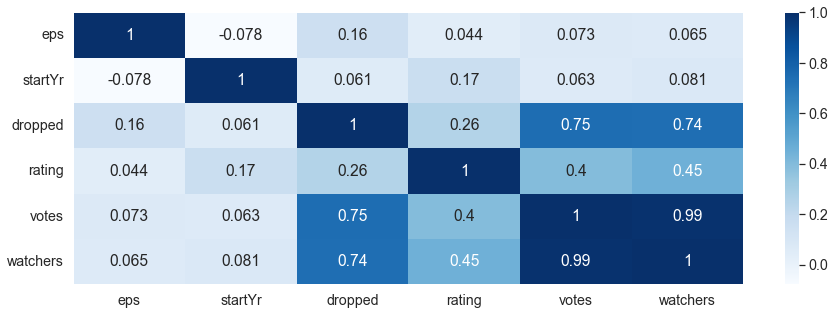

In [195]:
sns.heatmap(df.corr(), annot=True, cmap = 'Blues')

* relation between votes and watchers

<AxesSubplot:xlabel='votes', ylabel='watchers'>

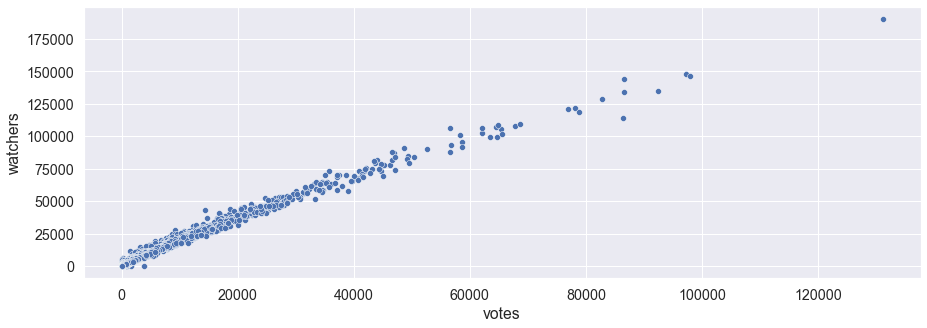

In [307]:
sns.scatterplot(data = df, x = 'votes', y = 'watchers')

* relation between dropped and watchers

<AxesSubplot:xlabel='votes', ylabel='dropped'>

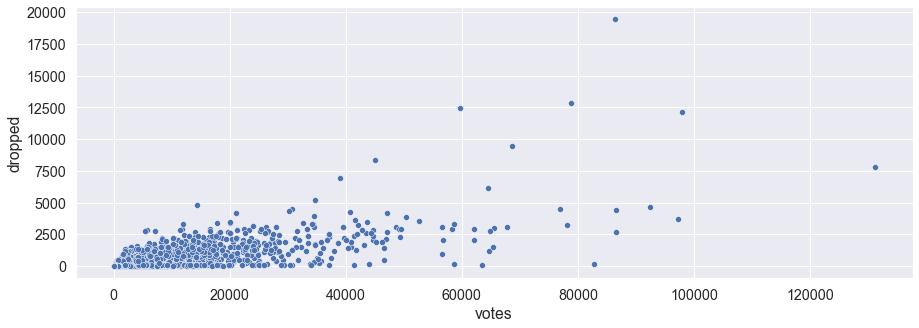

In [301]:
sns.scatterplot(data = df, x = 'dropped', y = 'watchers')

* relation between rating and watchers

<AxesSubplot:xlabel='rating', ylabel='watchers'>

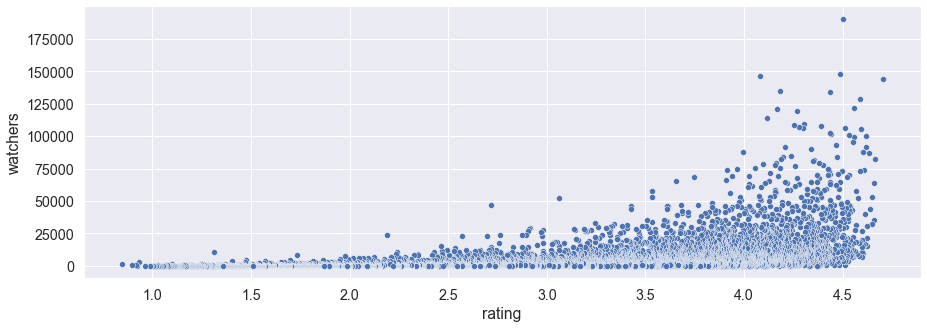

In [308]:
sns.scatterplot(data = df, x = 'rating', y = 'watchers')

* Rating Distribution

Text(0.5, 1.0, 'Rating Distribution')

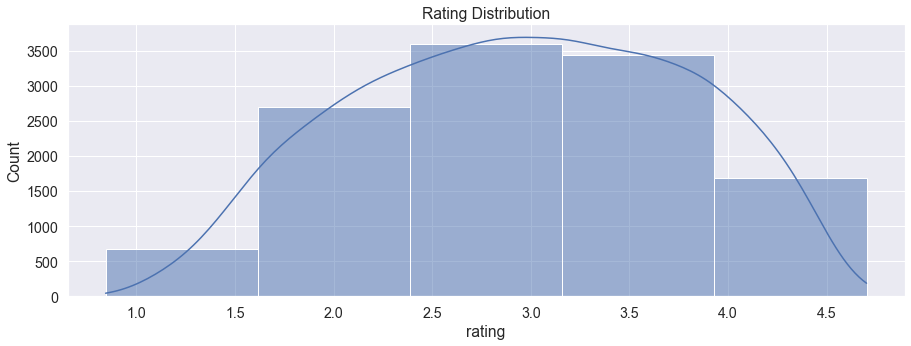

In [290]:
sns.histplot(data = df, x = 'rating', bins = 5, kde = True)
plt.title('Rating Distribution')

* mediaType produced

<AxesSubplot:ylabel='mediaType'>

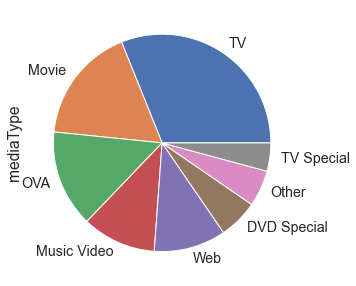

In [198]:
df['mediaType'].value_counts().plot(kind = 'pie')

* relation between mediaType and rating

<AxesSubplot:xlabel='mediaType', ylabel='rating'>

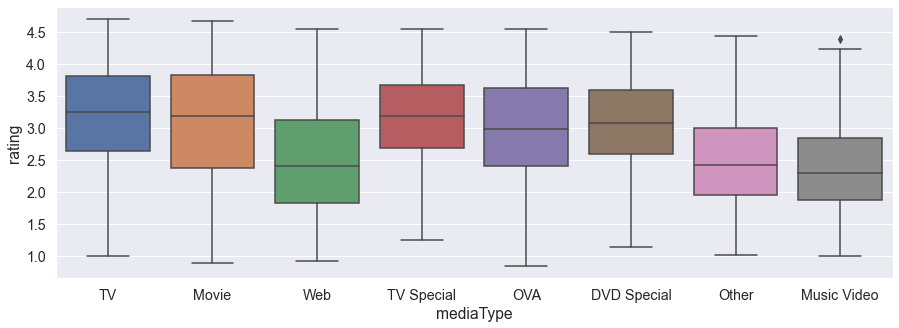

In [294]:
sns.boxplot(data = df, x = 'mediaType', y = 'rating')

* watched tags

<AxesSubplot:xlabel='tags'>

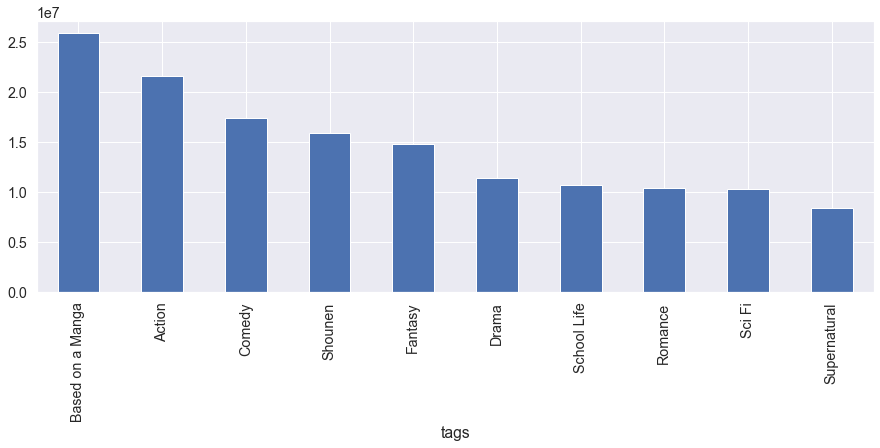

In [240]:
df['tags'] = df['tags'].apply(str).apply(lambda x : x.split("'")[1::2])
tags_df = df.explode('tags')
tags_df.groupby('tags')['watchers'].sum().sort_values(ascending = False)[:10].plot(kind = 'bar')

* TV anime studios

<AxesSubplot:>

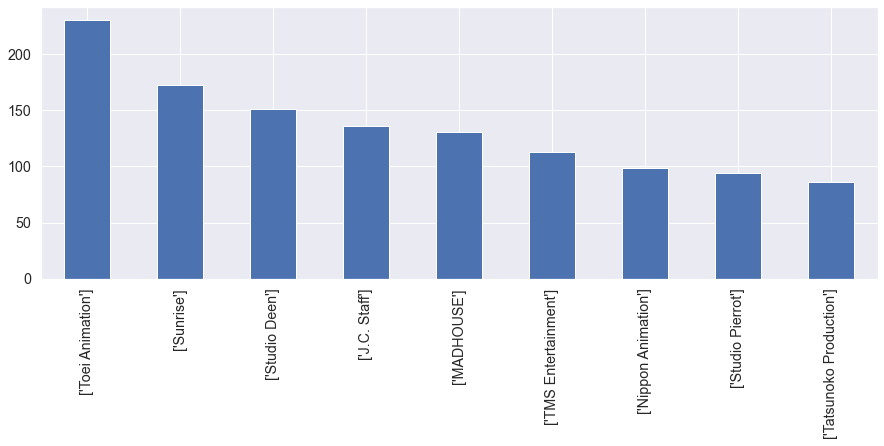

In [235]:
df[df['mediaType'] == 'TV']['studios'].value_counts()[1:10].plot(kind = 'bar')

* Years that has movies with rating > 4.5

<AxesSubplot:ylabel='startYr'>

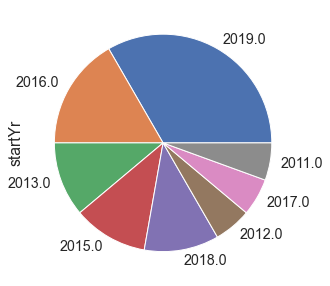

In [277]:
df[(df['mediaType']=='Movie')&(df['startYr']>2010)&(df['rating']>4.5)]['startYr'].value_counts().plot(kind = 'pie')

* dropped contentWarn

<AxesSubplot:xlabel='contentWarn'>

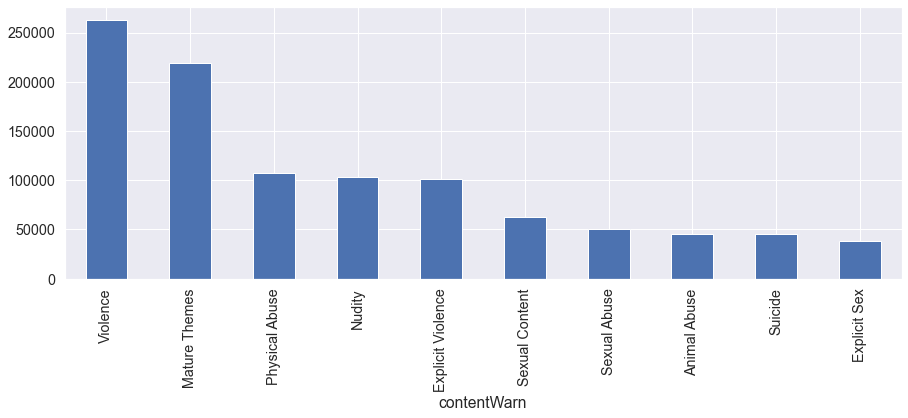

In [237]:
df['contentWarn'] = df['contentWarn'].apply(str).apply(lambda x : x.split("'")[1::2])
tags_df = df.explode('contentWarn')
tags_df.groupby('contentWarn')['dropped'].sum().sort_values(ascending = False)[:10].plot(kind = 'bar')